In [25]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [27]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.sample(5)

,Survived,Age,Fare
401,0,26.0,8.05
21,1,34.0,13.00
476,0,34.0,21.00
696,0,44.0,8.05
322,1,30.0,12.35


In [29]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [31]:
df.Age.fillna(df.Age.mean(),inplace=True)

C:\Users\Awaab\AppData\Local\Temp\ipykernel_4176\1807494962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.mean(),inplace=True)


In [33]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [35]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

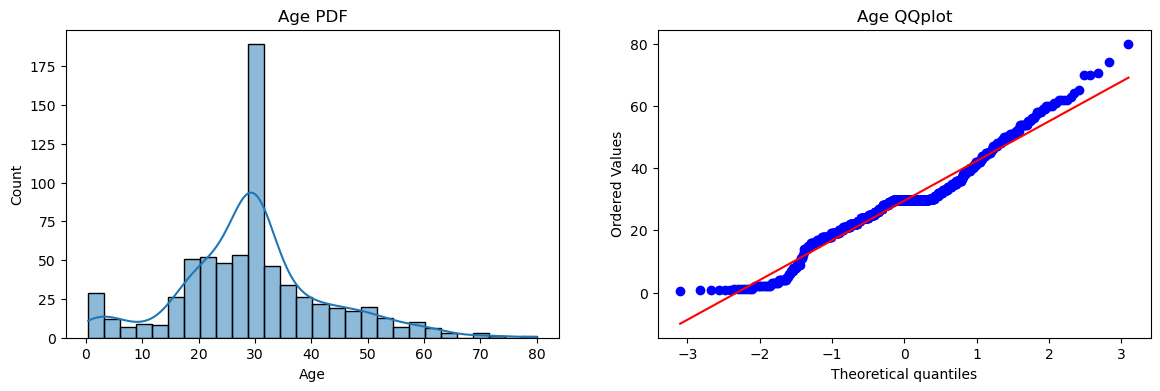

In [56]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQplot')

plt.show()

C:\Users\Awaab\AppData\Local\Temp\ipykernel_4176\3171544731.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'],kde=True)


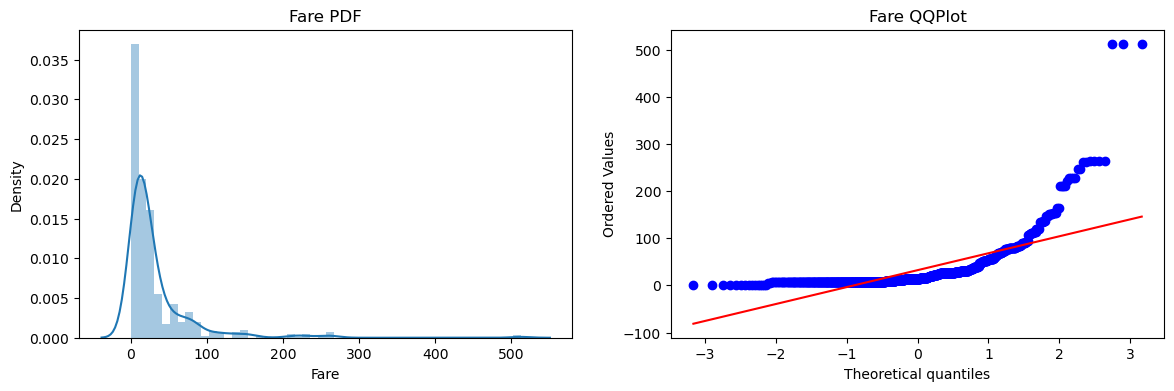

In [60]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Fare'],kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(df['Fare'],plot=plt)
plt.title('Fare QQPlot')

plt.show()

In [62]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [66]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print('Accuracy Score LR', accuracy_score(y_test,y_pred))
print('Accuracy Score DT', accuracy_score(y_test,y_pred2))


Accuracy Score LR 0.6480446927374302
Accuracy Score DT 0.6815642458100558


In [68]:
trf = FunctionTransformer(func=np.log1p)

In [70]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [74]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred_lr = clf.predict(X_test_transformed)
y_pred_dt = clf2.predict(X_test_transformed)

print('Accuracy score LR',accuracy_score(y_test,y_pred_lr))
print('Accuracy score DT',accuracy_score(y_test,y_pred_dt))




Accuracy score LR 0.6815642458100558
Accuracy score DT 0.6815642458100558


In [76]:
# cross validation
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print('Dt',np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))



LR 0.678027465667915
Dt 0.6599999999999999


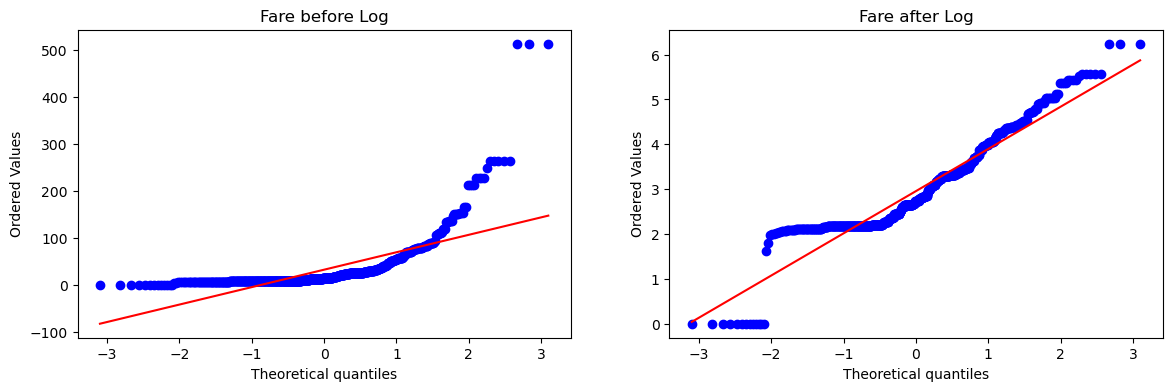

In [80]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],plot=plt)
plt.title('Fare after Log')

plt.show()

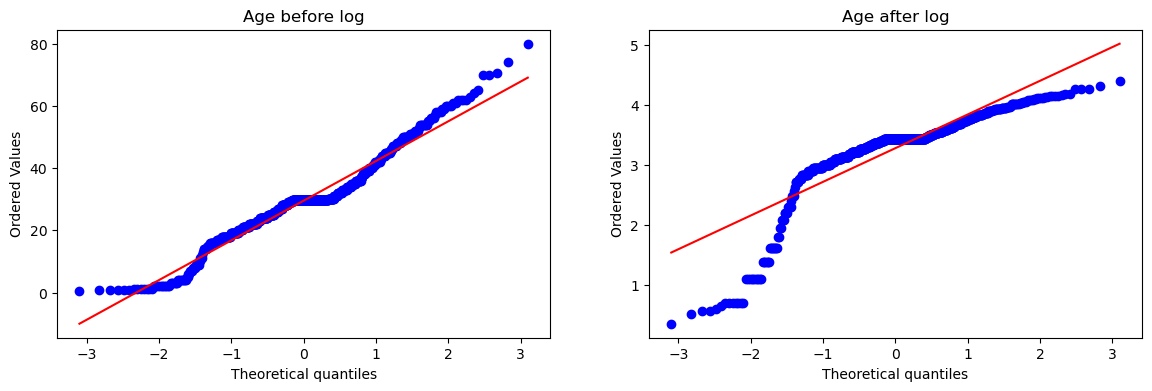

In [84]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],plot=plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],plot=plt)
plt.title('Age after log')
plt.show()

In [89]:
trf = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [91]:
X_train_transformed2 = trf.fit_transform(X_train)
X_test_transformed2 = trf.transform(X_test)

In [93]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [95]:
clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

DecisionTreeClassifier()

In [97]:
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

In [99]:
print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [107]:
X_transformed2 = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [111]:

print('Accuracy LR',np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print('Accuracy DT',np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

Accuracy LR 0.6712609238451936
Accuracy DT 0.6577028714107366
